# Numerical Simulation Laboratory

# Numerical exercise 12

## Exercise 12.1

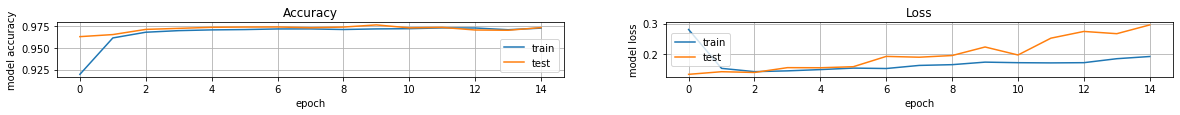

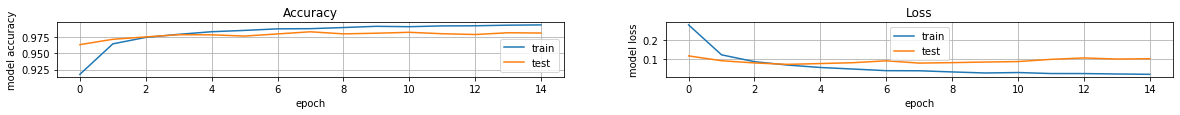

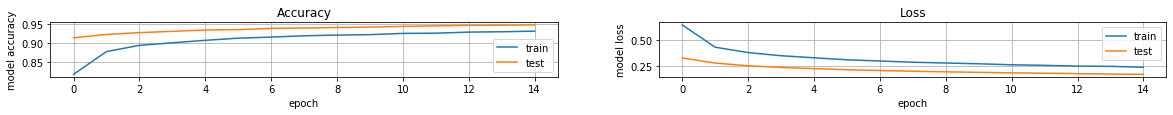

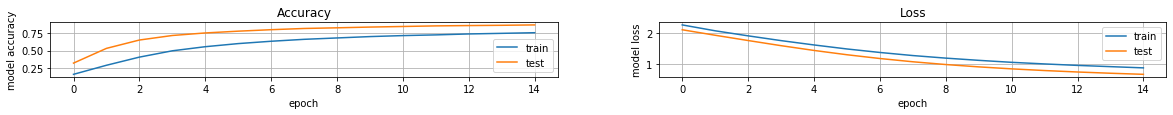

In [24]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

opt = ['RMSprop', 'Adam', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
sub = [621, 622, 623, 624, 625, 626, 627, 628, 629]

for i in range(4):
    
    history = pd.read_csv('Code/exercise1/' + str(opt[i]) + '.log', sep=',', engine='python')
    plt.figure(figsize=(20, 7))

    plt.subplot(sub[2*i]) #summarize history for accuracy
    plt.title('Accuracy')
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.grid()

    plt.subplot(sub[2*i+1])
    plt.title('Loss')
    plt.plot(history['loss'])  #summarize history for loss
    plt.plot(history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.grid()
    
plt.show()

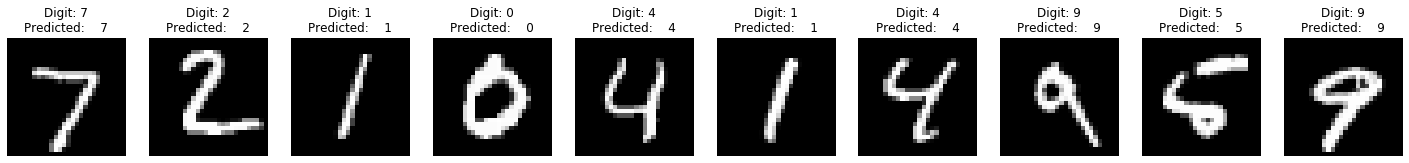

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

img_rows, img_cols = 28, 28 # number of pixels 

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
X_test = X_test.astype('float32')
X_test /= 255
Y_test = keras.utils.to_categorical(Y_test, 10)

savedpath = "Code/exercise1/modelAdam"
model = tf.keras.models.load_model(filepath=savedpath)
predictions = model.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(25, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()


## Exercise 12.2

313/313 [==============================] - 6s 18ms/step - loss: 0.0477 - accuracy: 0.9845

Test loss: 0.04773101955652237
Test accuracy: 0.984499990940094


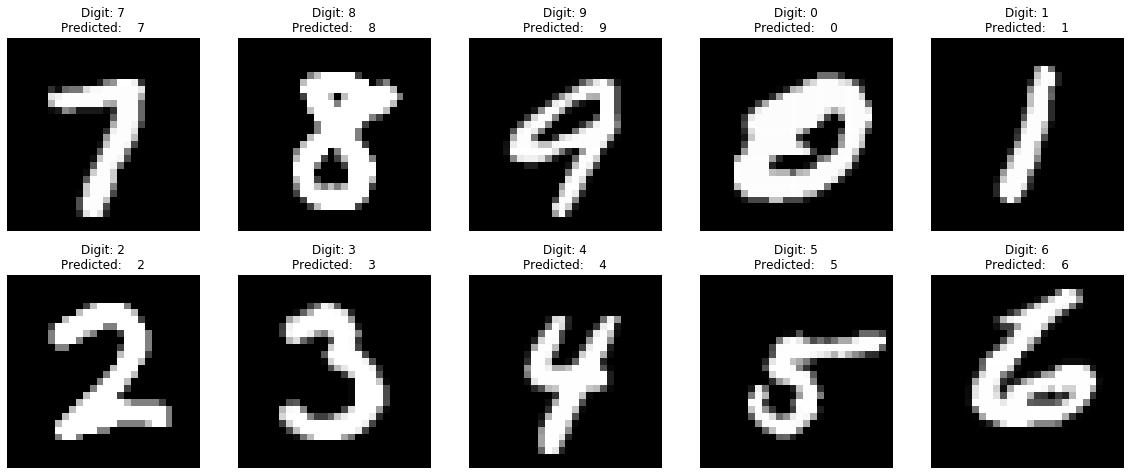

In [60]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.datasets import mnist


img_rows, img_cols = 28, 28 # number of pixels 
num_classes = 10 # 10 digits

#load test and train data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
X_test = X_test.astype('float32')
X_test /= 255
Y_test = keras.utils.to_categorical(Y_test, 10)

#load saved model
savedpath = "Code/exercise2/model"
model = tf.keras.models.load_model(filepath=savedpath)
predictions = model.predict(X_test)
# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#cambia valore per vedere risultati su figure differenti
n=9990  #max 9990
plt.figure(figsize=(20, 8)) 
for i in range(10):    
    ax = plt.subplot(2, 5, i + 1)    
    plt.imshow(X_test[i+n, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i+n]), np.argmax(predictions[i+n])))    
    plt.axis('off') 
plt.show()

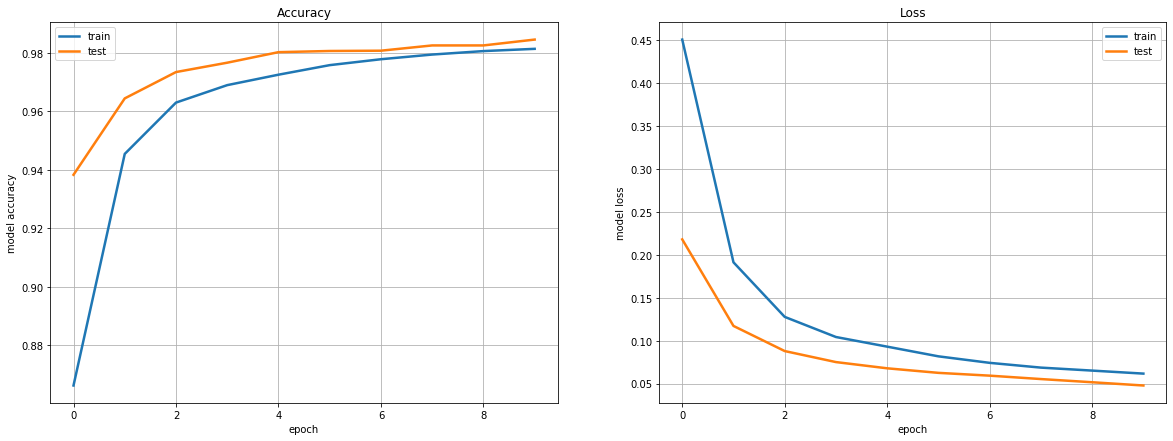

In [58]:
history = pd.read_csv('Code/exercise2/model.log', sep=',', engine='python')
plt.figure(figsize=(20, 7))

plt.subplot(121) #summarize history for accuracy
plt.title('Accuracy')
plt.plot(history['accuracy'], lw=2.5)
plt.plot(history['val_accuracy'], lw=2.5)
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()

plt.subplot(122)
plt.title('Loss')
plt.plot(history['loss'], lw=2.5)  #summarize history for loss
plt.plot(history['val_loss'], lw=2.5)
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()